## Install Requirements and Clone the Ultralytics yolov5 Respository

In [4]:
import torch
torch.cuda.is_available()

True

In [2]:
# Installing the correct (to this date June 2022) pytorch dependency so that the yolov5 model can run on the gpu
%pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
     ---------------------------------------- 2.3/2.3 GB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 38.6 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
# Cloning the ultralytics yolov5 repository to the parent directory
!cd .. & git clone https://github.com/ultralytics/yolov5

'git' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [7]:
# Installs all the necessary libraries to train the yolov5 network
!cd ../yolov5 & pip install -r requirements.txt

     --------------------------------------- 42.5/42.5 MB 59.5 MB/s eta 0:00:00
     --------------------------------------- 10.9/10.9 MB 73.0 MB/s eta 0:00:00
     ------------------------------------- 293.3/293.3 kB 18.9 MB/s eta 0:00:00
     ---------------------------------------- 232.7/232.7 kB ? eta 0:00:00
     ---------------------------------------- 93.3/93.3 kB ? eta 0:00:00
     ---------------------------------------- 155.3/155.3 kB ? eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB ? eta 0:00:00
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


## Train Model

In [8]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Imports
import torch
from matplotlib import pyplot as plt
import cv2
import numpy as np  
import os
import utils

display = utils.notebook_init()  # checks
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

YOLOv5 🚀 2023-11-12 Python-3.11.7 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16109MiB)


Setup complete ✅ (16 CPUs, 31.1 GB RAM, 205.8/1832.2 GB disk)


In [3]:
# !pip install wandb -qqq
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: xuantingmeng. Use `wandb login --relogin` to force relogin


True

Darwin V7 Labs annotation data pull

In [1]:
# !pip3 install darwin-py
from darwin.client import Client
import darwin.item as item

API_KEY = "AfptaoB.h7N8Pok7jJcuuBOt45F4RNMJiO6ecNEp"
client = Client.from_api_key(API_KEY)

In [4]:

dataset = client.get_remote_dataset("yolov5-label/yolov5-anotate")

release = dataset.get_release('test2video')
print(release.name)
dataset.pull(release = release, video_frames=True)

test2video


Output()

(None, 273)

In [55]:
from pathlib import Path
release.download_zip(Path(f"./{release_name}.zip"))

WindowsPath('yolo.zip')

In [1]:
# Train the yolov5s network, see https://github.com/ultralytics/yolov5 for further information.
# Make sure that you put the "yolo_dataset.yaml" into the cloned yolov5 git repository
!python train.py --img 1280 --batch 18 --epochs 60 --data yolo_dataset.yaml --weights yolov5m6.pt --bbox_interval 10 --save-period 10 --device 0 --upload_dataset --workers 0 --patience 10 

Command 'git remote -v' returned non-zero exit status 1.


wandb: Currently logged in as: xuantingmeng. Use `wandb login --relogin` to force relogin
train: weights=yolov5m6.pt, cfg=, data=yolo_dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=60, batch_size=18, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=10, freeze=[0], save_period=10, seed=0, local_rank=-1, entity=None, upload_dataset=True, bbox_interval=10, artifact_alias=latest
'git' is not recognized as an internal or external command,
operable program or batch file.
'git' is not recognized as an internal or external command,
operable program or batch file.
YOLOv5  2022-10-17 Python-3.9.13 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

hyperparameters: lr0=0.01, lrf=0.01,

## Load Model

In [25]:
# Load trained model. 
# For your own trained weights load the weights from the newes yolov5/runs/train/exp folder.
model = torch.hub.load('ultralytics/yolov5', 'custom', 
                       path='C:/Users/xumeng/1622 Bachelor Thesis-20221007T105157Z-001/yolov5/runs/train/exp/weights/best.pt', 
                       force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\xumeng/.cache\torch\hub\master.zip
YOLOv5  2022-10-17 Python-3.9.13 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


image 1/1: 3024x4032 1 cable_1, 1 alu_part, 1 Oring, 1 coupling_nut
Speed: 111.5ms pre-process, 23.6ms inference, 6.2ms NMS per image at shape (1, 3, 480, 640)


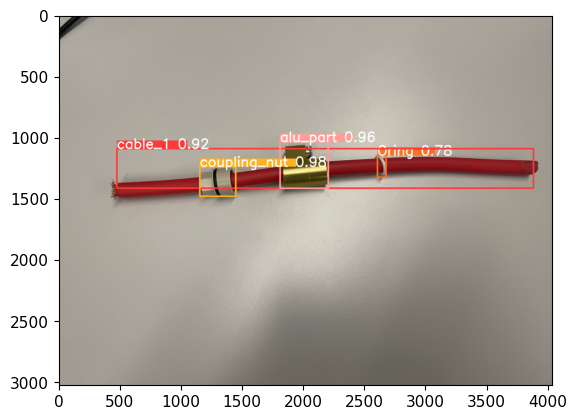

image 1/1: 3024x4032 1 cable_1, 1 alu_part, 1 Oring, 1 coupling_nut
Speed: 102.6ms pre-process, 13.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


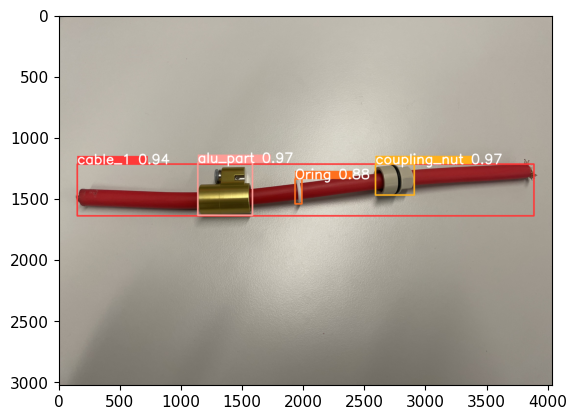

image 1/1: 3024x4032 1 cable_1, 1 alu_part, 1 Oring, 1 coupling_nut
Speed: 101.2ms pre-process, 17.0ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)


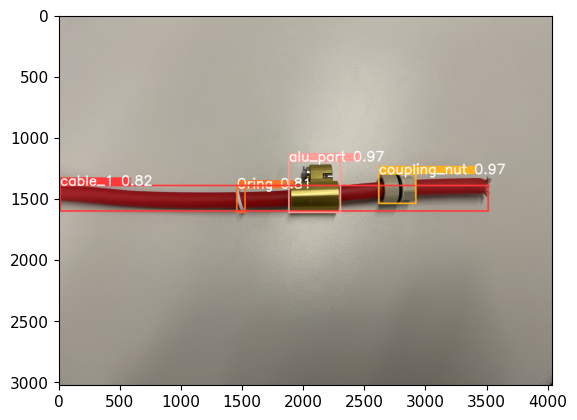

In [27]:
# Feed an image to the model and print the detection results
from pathlib import Path
import random
# testimg_location = Path('C:/Users/xuant/Desktop/1622 Bachelor Thesis-20221007T105157Z-001/Data/Blender/images/Dataset/test/class1')

# dir = os.listdir(testimg_location)
# random.shuffle(dir)
# rdm_img = dir[0]
testimg_location = Path('C:/Users/xumeng/1622 Bachelor Thesis-20221007T105157Z-001/videos')
for files in os.listdir(testimg_location):
    if (files.endswith('.jpeg')):
        # continue
    # else:
        img = os.path.join(testimg_location,files)
        results = model(img)
        results.print()
        %matplotlib inline 
        plt.imshow(np.squeeze(results.render()))
        plt.show()

In [8]:
# Visualize the resuslts
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

NameError: name 'results' is not defined

In [64]:
from utils.plots import plot_results
plot_results('C:/Users/xumeng/1622 Bachelor Thesis-20221007T105157Z-001/yolov5/runs/train/v5m6_noparts/results.csv')

Validation

In [29]:
!python val.py --weights ./runs/train/v5m/weights/last.pt --data yolotest.yaml --imgsz 640 --task val --name v5m --save-txt

val: data=yolotest.yaml, weights=['./runs/train/v5m/weights/last.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=v5m, exist_ok=False, half=False, dnn=False
fatal: cannot change to 'C:\Users\xumeng\1622': No such file or directory
YOLOv5  2022-10-17 Python-3.9.13 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

Fusing layers... 
Model summary: 212 layers, 20873139 parameters, 0 gradients, 47.9 GFLOPs

val: Scanning 'C:\Users\xumeng\1622 Bachelor Thesis-20221007T105157Z-001\Data\Val_set2\combined\labels.cache' images and labels... 273 found, 0 missing, 72 empty, 0 corrupt: 100%|██████████| 273/273 [00:00<?, ?it/s]
val: Scanning 'C:\Users\xumeng\1622 Bachelor Thesis-20221007T105157Z-001\Data\Val_set2\combined\labels.cache' images and labels... 273 found, 0 missing, 72 empty, 0 co

Test